In [1]:
from fastai.vision.all import *

Using fastai tutorial : https://docs.fast.ai/tutorial.vision.html 

In [2]:
path =  untar_data(URLs.PETS)

In [3]:
path.ls()

(#2) [Path('C:/Users/scastaneda/.fastai/data/oxford-iiit-pet/annotations'),Path('C:/Users/scastaneda/.fastai/data/oxford-iiit-pet/images')]

In [4]:
files = get_image_files(path/"images")
len(files)

7390

To know which photos are dogs/cats we need to know which files are labeled dog and cats (lowercase letter = dogs, uppercase = cats)

In [5]:
files[0], files[6]

(Path('C:/Users/scastaneda/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),
 Path('C:/Users/scastaneda/.fastai/data/oxford-iiit-pet/images/Abyssinian_104.jpg'))

In [6]:
def label_func(f) : return f[0].isupper()

^Easy label function

In [8]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms = Resize(224))

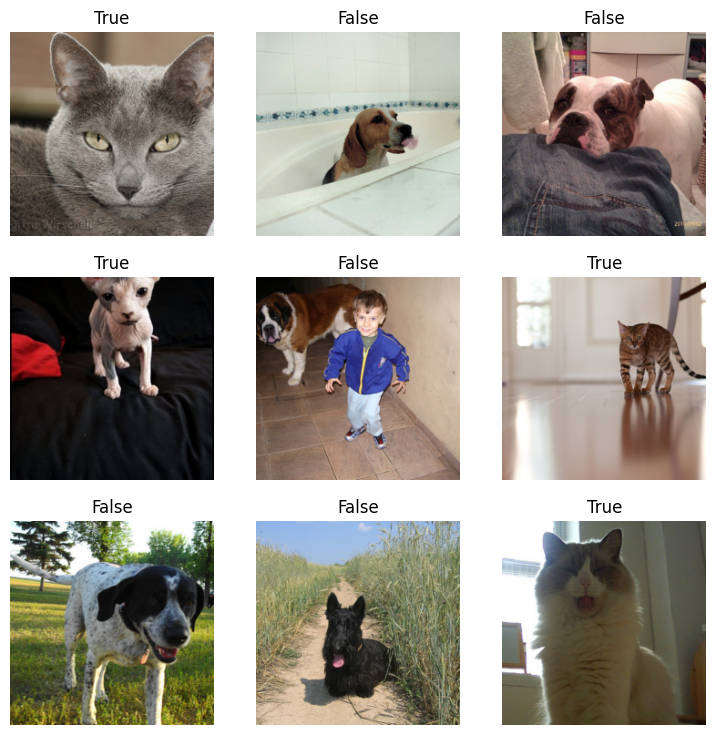

In [9]:
dls.show_batch()

In [10]:
learn = vision_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\scastaneda/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 90.1MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.151963,0.023869,0.008119,06:40


epoch,train_loss,valid_loss,error_rate,time
0,0.074317,0.030648,0.007442,08:26


In [12]:
learn.predict(files[0])

('True', tensor(1), tensor([1.4432e-15, 1.0000e+00]))

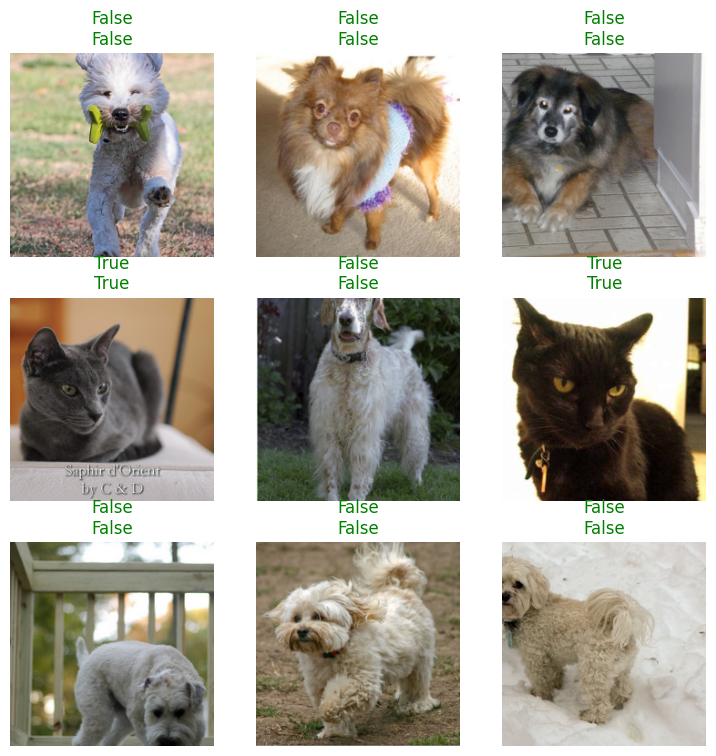

In [13]:
learn.show_results()

In [11]:
files[0].name

'Abyssinian_1.jpg'

To see breed name we need to see the actual file name which is ran above.

So everything we need is before the last _. To grab the name we run the expression:

In [14]:
pat = r'^(.*)_\d+.jpg'

In [15]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

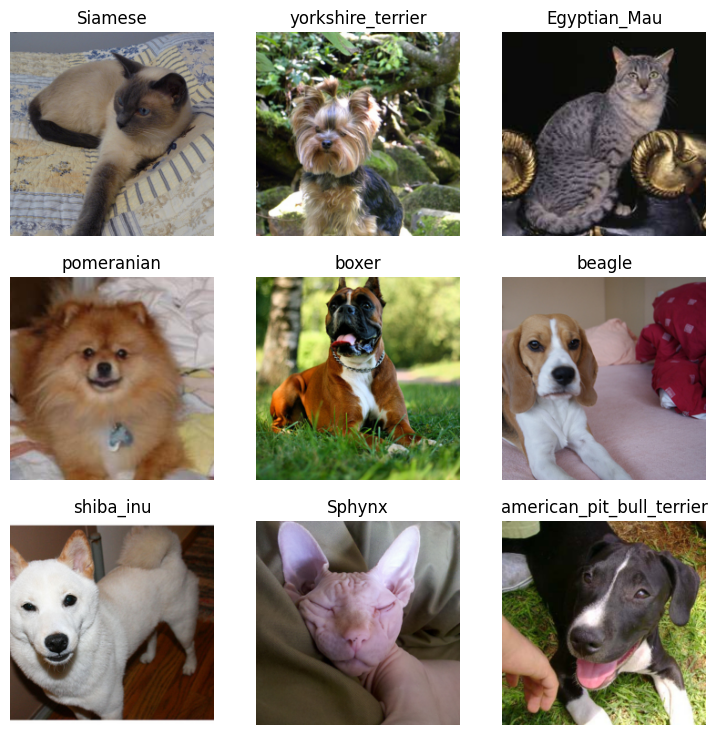

In [16]:
dls.show_batch()

In [17]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
  batch_tfms=aug_transforms(size=224))

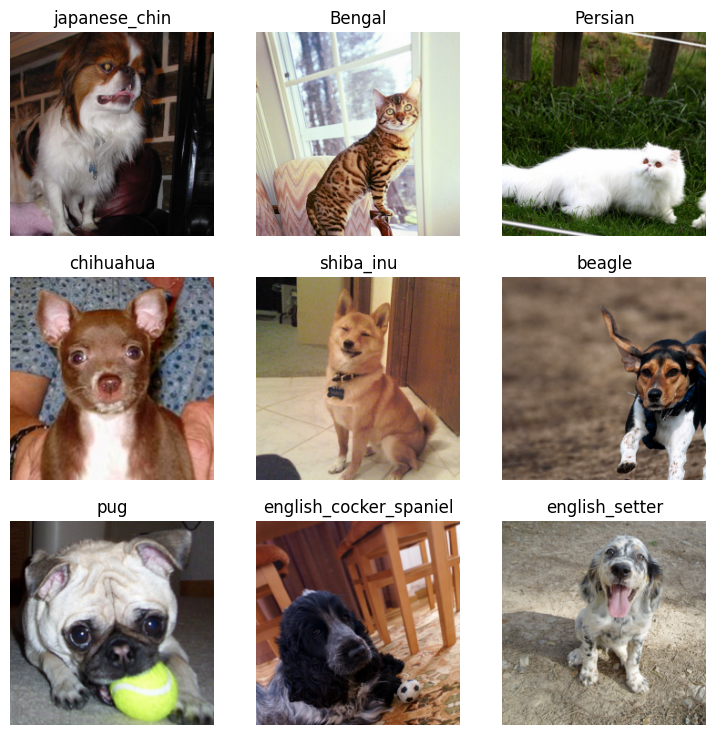

In [18]:
dls.show_batch()

In [2]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

NameError: name 'vision_learner' is not defined

Make the Learner

SuggestedLRs(valley=0.0005754399462603033)

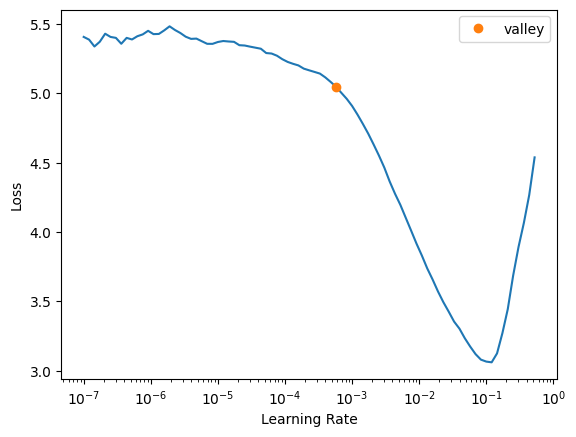

In [20]:
learn.lr_find()

In [1]:
learn.fine_tune(2, 3e-3)

NameError: name 'learn' is not defined

This is fine tuning the learning rate